# Hypothesis Testing

This notebook contains some simulation exercises to explore hypothesis testing. We will first simulate a sample drawn from a normal random variable with a specified mean and variance and test it against a different mean. 

Since we know the truth mean in this case, we can examine the different characteristics of statistical inference and the performance of the t-test. 

## Simulating the sample 

We use a specific submodule of [scipy](https://scipy.org/)https://scipy.github.io/devdocs/tutorial/stats.html) which focus on statistics. 


In [1]:
#import the usual modules
import numpy as np
import scipy as sp
import scipy.stats as sps # can give submodule a differnt nickname. 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

In [7]:
#Draw a sample
mu = 3 #setting the true mean.
sigma = 1 #setting the true variance.
N = 30 #setting sample size.
sample0 = sps.norm.rvs(size=N, loc=mu, scale=sigma) # Simulate (draw) from a normal random variable. 
sample0_mean = np.mean(sample0) # calculate the mean from the simulated sample. 
sample0_variance = np.var(sample0,ddof=1) # calculate the variance of the simulated sample. 
#print the sample mean and variance
print('The sample mean is {0:.4} and the sample variance is {1:.4}'.format(sample0_mean, sample0_variance)) 

The sample mean is 2.938 and the sample variance is 1.251


Let's also take a look at the histogram of the simulated data. 

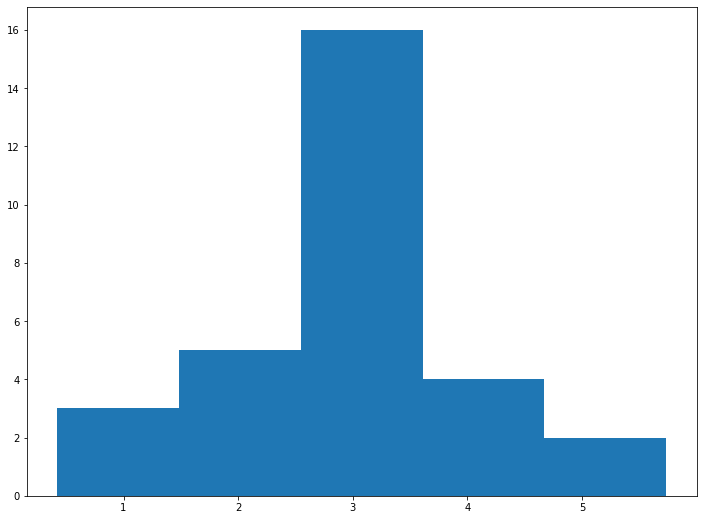

In [8]:
hist = plt.hist(sample0, bins=int(N/6))

In practice, you generally do not know the true mean. Let's assume we have good reason to believe the true mean in this case is 5. So we are testing 
$$ H_0: \mu = 5 $$
$$ H_0: \mu \neq 5$$
We know this is not ture, so our t-test should reject the null under reasonable level of significance, let say 5%. 

In [9]:
null = 5 #set the null value. 
#calculate the test statistics
tstat = (sample0_mean-null)/np.power(sample0_variance/N,0.5)
print('The t-statistic in this case is {0}'.format(tstat))

The t-statistic in this case is -10.096346178569789


The t-statistics follows a t-distribution with $N-1=29$ degrees of freedom. 

In [10]:
alpha = 0.05 #define the significance level of the test.
cv = sps.t.isf([1-alpha/2,alpha/2],df=N-1)
pvalue = 2*(1-sps.t.cdf(abs(tstat),df=N-1))
print('The critical values are {0:.4} and {1:.04}'.format(*cv))
print('The p-value is {0:.4}'.format(pvalue))


The critical values are -2.045 and 2.045
The p-value is 5.307e-11


So we reject the null. 

Exercise
========
1. If you change the null value from 5 to 3 (the true value). Will you still reject the null? 
2. Carry out the same test again using the scipy.stats.ttest_1samp() function. This function carries out the t-test for you rather than having to define the t-statistics and generate critical value like the above. Do you get identical results? 

In [12]:
sps.ttest_1samp(sample0, null)

Ttest_1sampResult(statistic=-10.096346178569789, pvalue=5.3071834299668785e-11)

## $\alpha$ - Significance level of the test

The significance level of a test, $\alpha$, is the probability of Type I error (reject the true null) tolerated by the test. To illustrate this, we will first draw B samples, each with N observations from a normal random variable. Then we will conduct a t-test to test the true null for each sample. We should expect 5% of the t-tests incorrectly rejects the null.

The percentage of rejection is 0.0541


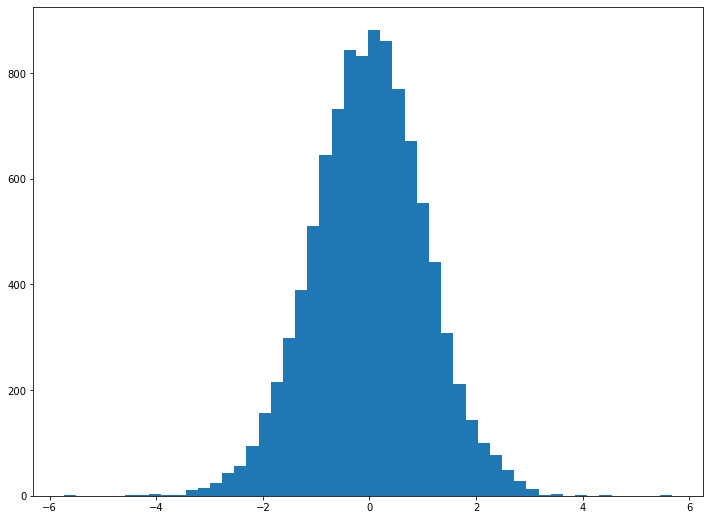

In [21]:
B = 10000 #setting the number of repeated sample. 
samples = sps.norm.rvs(size=(B,N), loc=mu, scale=sigma) #the true mean is mu. 
result = sps.ttest_1samp(samples,mu,axis=1)
plt.hist(result[0], bins=50) #plot the test statistics
per_reject= sum([i<alpha for i in result[1]])/B #counting the number of reject cases
print('The percentage of rejection is {0:.4}'.format(per_reject))

Exercise
========
What happens as you increase the number of repeated samples? 

## $1-\beta$ - The power of the test

$\beta$ is the probability of Type II error (accepting the false null, also known as *specificity*). $1-\beta$ is often known as the power of the test, the ability of a test to reject the false null. 

The percentage of rejection is 1.0


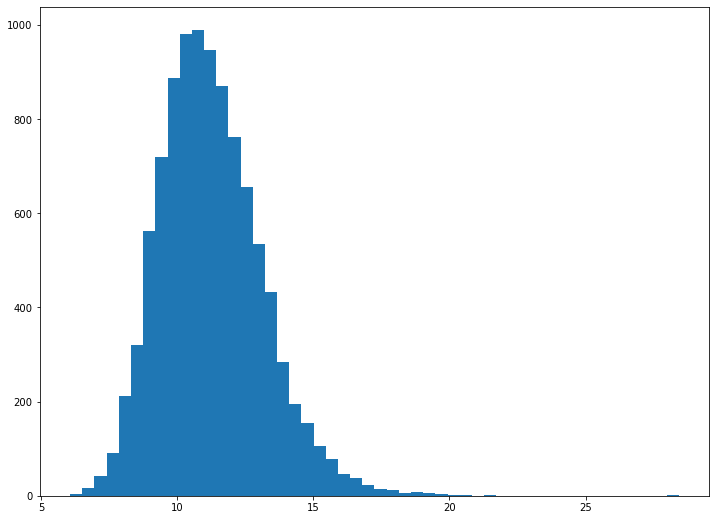

In [24]:
incr = -2 #set deviation from true null
falsenull = mu+incr #set a false null
result_beta = sps.ttest_1samp(samples,falsenull,axis=1) # testing against the false null. 
plt.hist(result_beta[0], bins=50) #plot the test statistics
per_reject_falsenull= sum([i<alpha for i in result_beta[1]])/B #calculate the percentage of reject cases
print('The percentage of rejection is {0:.4}'.format(per_reject_falsenull))

Exercise
========
The result above seems to suggest that the test is never wrong - the test always managed to reject the false null. What happens when you make *falsenull* closer and closer to the true null *mu*? Can you explain the results there? 

Exercise
========
Write a block of code, possibly a function, to examine the dist